# Setup

In [1]:
!pip install --upgrade scipy networkx

In [2]:
import networkx as nx

# More precisely working with vertex and edge features, and graphs

In [3]:
G = nx.Graph()
print(G.is_directed())

False


In [4]:
H = nx.DiGraph()
print(H.is_directed())

True


In [5]:
G.graph["Name"] = "Bar"
print(G.graph)

{'Name': 'Bar'}


In [6]:
G.add_node(0, feature=0, label=0)
node_0_attr = G.nodes[0]
print("Node 0 has the attributes {}".format(node_0_attr))

Node 0 has the attributes {'feature': 0, 'label': 0}


In [7]:
G.add_nodes_from([
  (1, {"feature": 1, "label": 1}),
  (2, {"feature": 2, "label": 2}),
  (3, {"feature": 3, "label": 3})
])
for node in G.nodes(data=True):
  print(node)

(0, {'feature': 0, 'label': 0})
(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})
(3, {'feature': 3, 'label': 3})


In [8]:
num_nodes = G.number_of_nodes()
print("G has {} nodes".format(num_nodes))

G has 4 nodes


In [9]:
G.add_edge(1, 2, weight=0.75)
edge_1_2_attr = G.edges[(1, 2)]
print("Edge (1, 2) has the attributes {}".format(edge_1_2_attr))

Edge (1, 2) has the attributes {'weight': 0.75}


In [10]:
G.add_edges_from([
  (1, 3, {"weight": 0.5}),
  (2, 0, {"weight": 0.3})
])
for edge in G.edges():
  print(edge)

(0, 2)
(1, 2)
(1, 3)


In [11]:
num_edges = G.number_of_edges()
print("G has {} edges".format(num_edges))

G has 3 edges


# Visualization

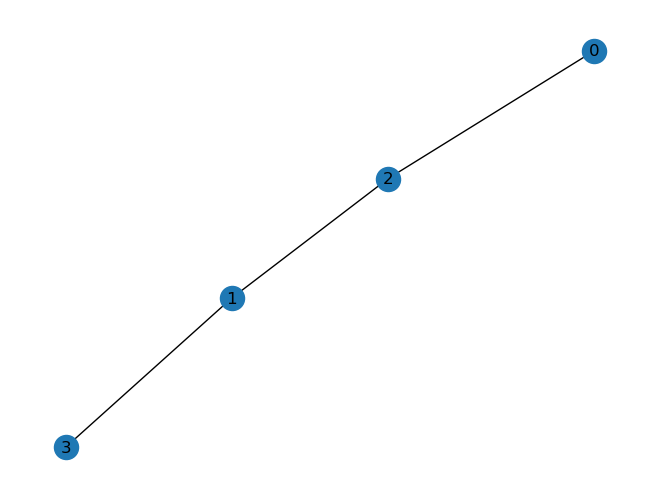

In [12]:
nx.draw(G, with_labels = True)

In [13]:
node_id = 1
print("Node {} has degree {}".format(node_id, G.degree[node_id]))

Node 1 has degree 2


In [14]:
for neighbor in G.neighbors(node_id):
  print("Node {} has neighbor {}".format(node_id, neighbor))

Node 1 has neighbor 2
Node 1 has neighbor 3


# PyTorch Geometric Tutorial

In [15]:
import torch
print("PyTorch has version {}".format(torch.__version__))

PyTorch has version 1.13.1+cpu


In [27]:
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
!pip install -q torch-geometric

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [32 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\torch_scatter
  copying torch_scatter\placeholder.py -> build\lib.win-amd64-cpython-39\torch_scatter
  copying torch_scatter\scatter.py -> build\lib.win-amd64-cpython-39\torch_scatter
  copying torch_scatter\segment_coo.py -> build\lib.win-amd64-cpython-39\torch_scatter
  copying torch_scatter\segment_csr.py -> build\lib.win-amd64-cpython-39\torch_scatter
  copying torch_scatter\utils.py -> build\lib.win-amd64-cpython-39\torch_scatter
  copying torch_scatter\__init__.py -> build\lib.win-amd64-cpython-39\torch_scatter
  creating build\lib.win-amd64-cpython-39\torch_scatter\composite
  copying torch_scatter\composite\logsumexp.py -> build\lib.win-amd64-cpython-39\torch_scatter\composite
  copying 

In [32]:
!pip install torch_scatter torch_sparse torch_cluster torch_spline_conv torch_geometric -f https://data.pyg.org/whl/torch-1.13.0+cpu.html

Looking in links: https://data.pyg.org/whl/torch-1.13.0+cpu.html
     ------------------------------------- 496.0/496.0 kB 70.7 kB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 261.7 kB/s eta 0:00:00
     ------------------------------------ 863.9/863.9 kB 382.1 kB/s eta 0:00:00
     ------------------------------------ 254.8/254.8 kB 113.4 kB/s eta 0:00:00


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\M\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 435, in _error_catcher
    yield
  File "C:\Users\M\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 516, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\M\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\Users\M\anaconda3\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "C:\Users\M\anaconda3\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\M\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\M\anaconda3\lib\ssl.py", line 1242, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\M\anaconda3\lib\ssl.py", line 1100, in read
    return self._sslobj.read(len, buffer)
socket.timeout: The read operation 

Looking in links: https://data.pyg.org/whl/torch-1.13.0+cu116.html
     ---------------------------------------- 3.6/3.6 MB 67.0 kB/s eta 0:00:00
     --------------------                     1.5/2.9 MB 32.8 kB/s eta 0:00:43


In [33]:
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt

In [34]:
def visualize(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

In [35]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


In [36]:
data = dataset[0]
print(data)
print('==============================================================')
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Number of training nodes: 4
Training node label rate: 0.12
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


C:\Users\M\anaconda3\lib\site-packages\torch_geometric\deprecation.py:12: UserWarning: 'contains_isolated_nodes' is deprecated, use 'has_isolated_nodes' instead
  warnings.warn(out)
C:\Users\M\anaconda3\lib\site-packages\torch_geometric\deprecation.py:12: UserWarning: 'contains_self_loops' is deprecated, use 'has_self_loops' instead
  warnings.warn(out)


In [38]:
from IPython.display import Javascript  # Restrict height of output cell.
edge_index = data.edge_index
print(edge_index.t())

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

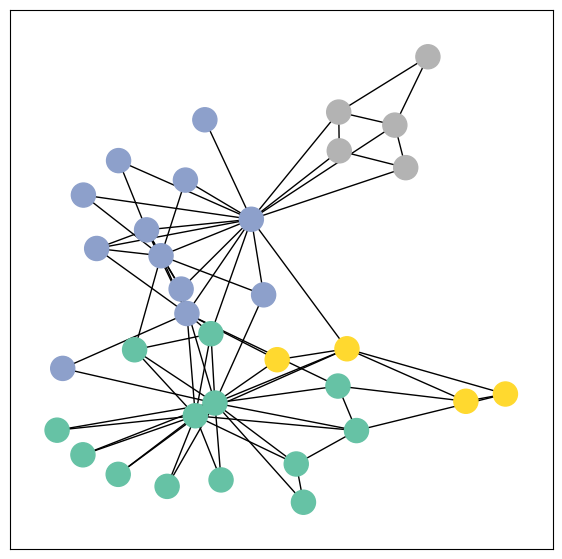

In [39]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize(G, color=data.y)

# Implementing Graph Neural Networks

In [41]:
from torch.nn import Linear
from torch_geometric.nn import GCNConv

In [42]:
class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


Embedding shape: [34, 2]


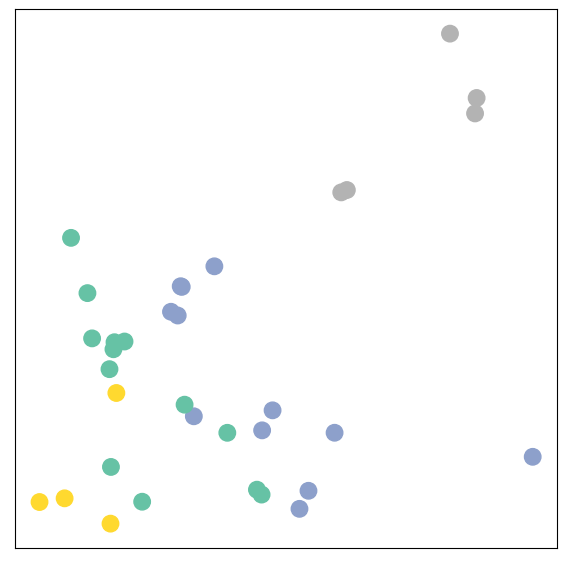

In [43]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize(h, color=data.y)

# Training on the Karate Club Network

In [44]:
import time
from IPython.display import Javascript

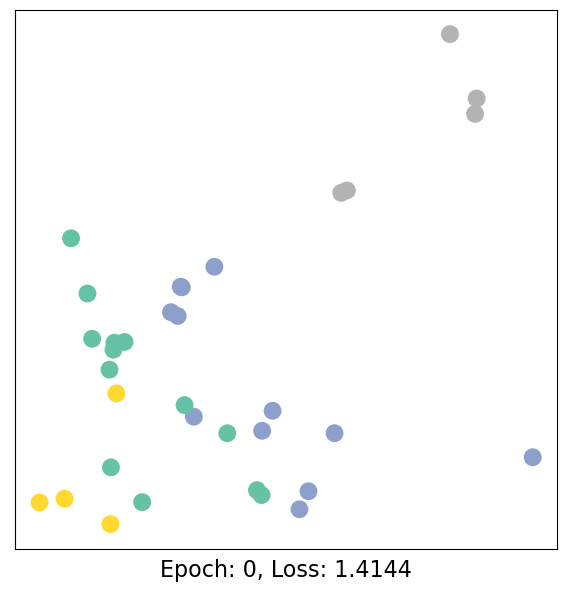

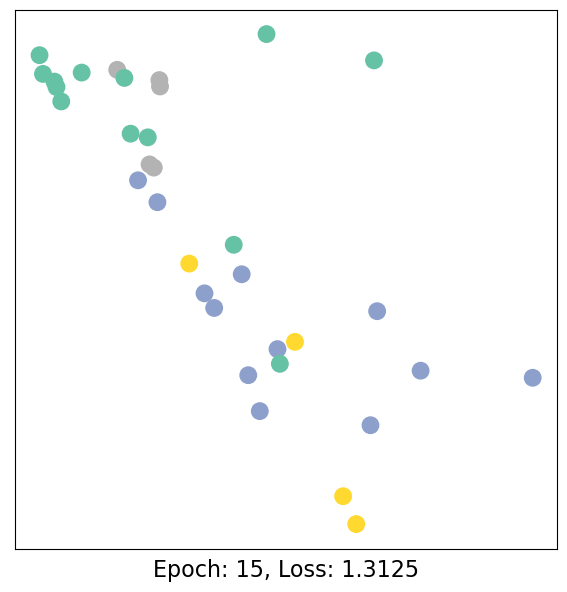

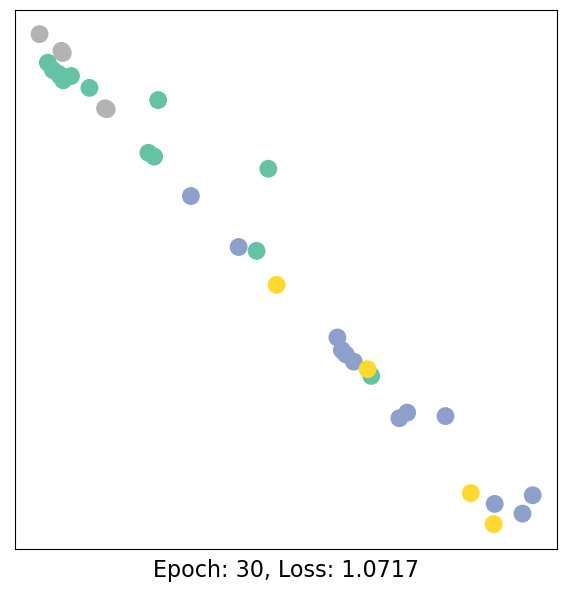

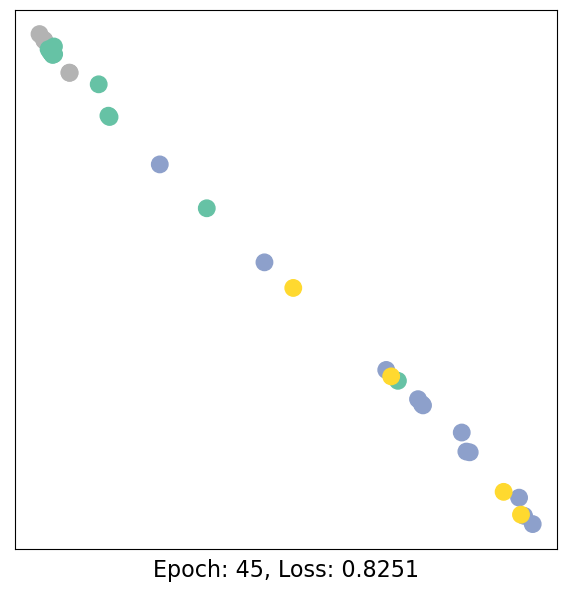

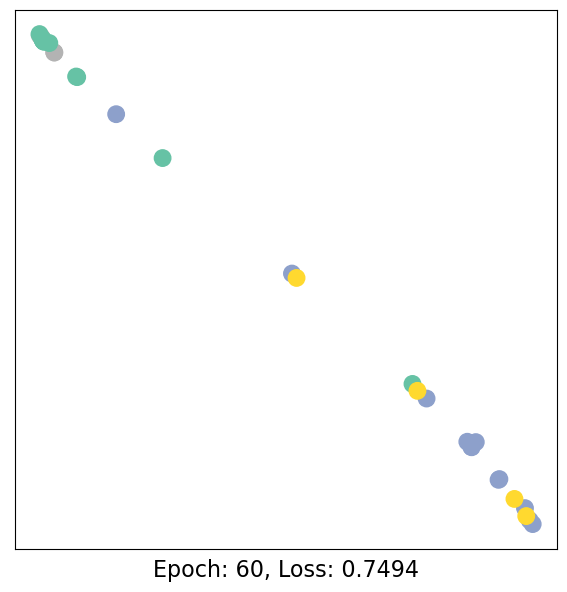

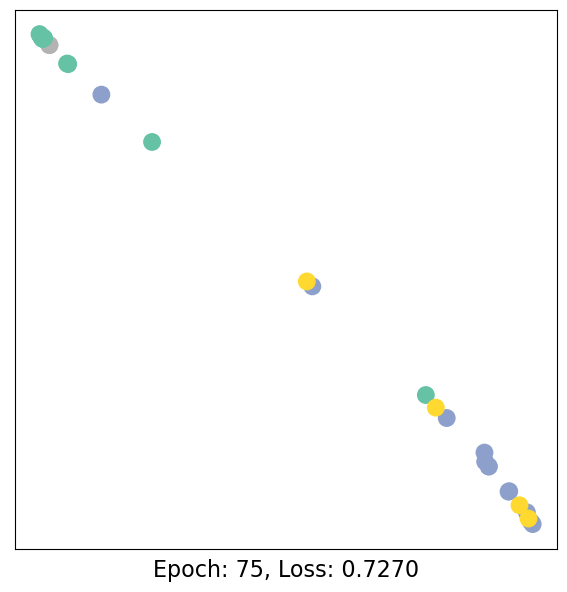

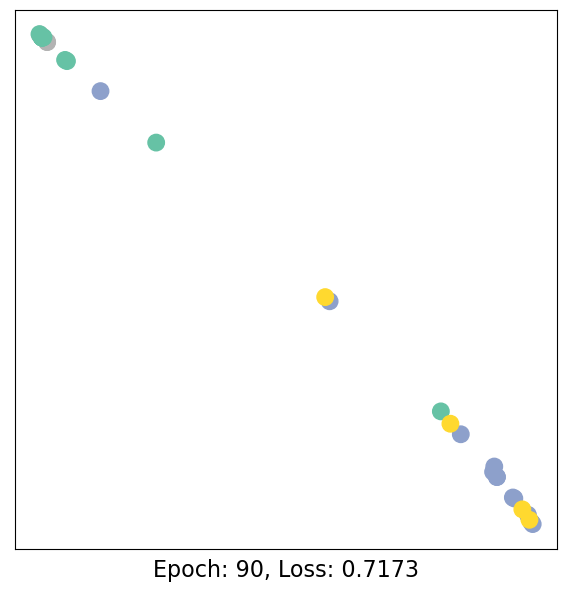

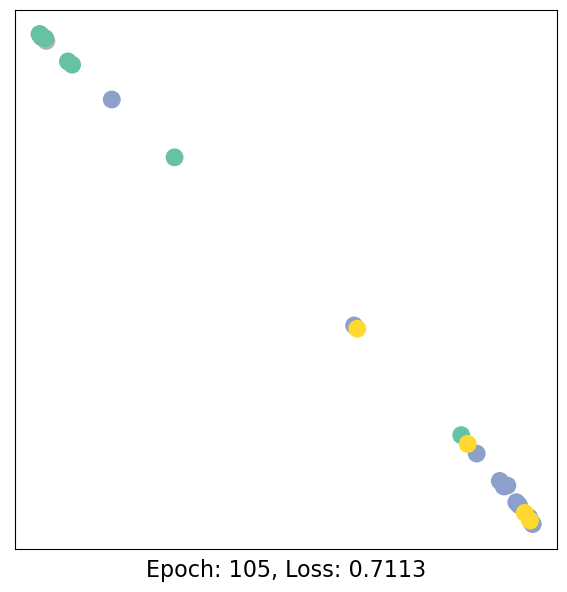

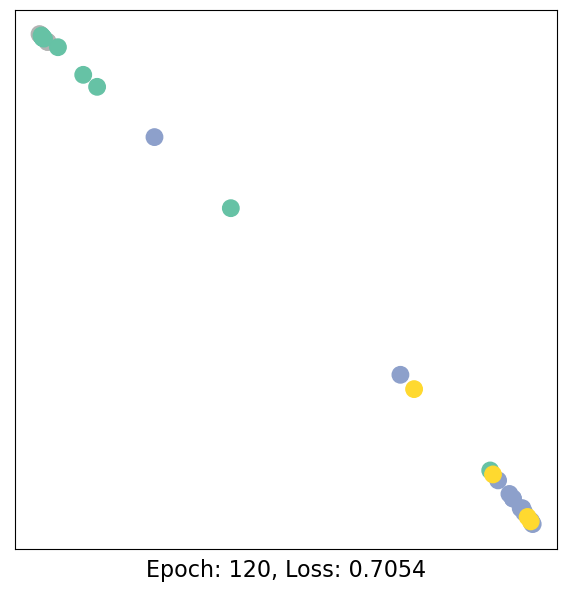

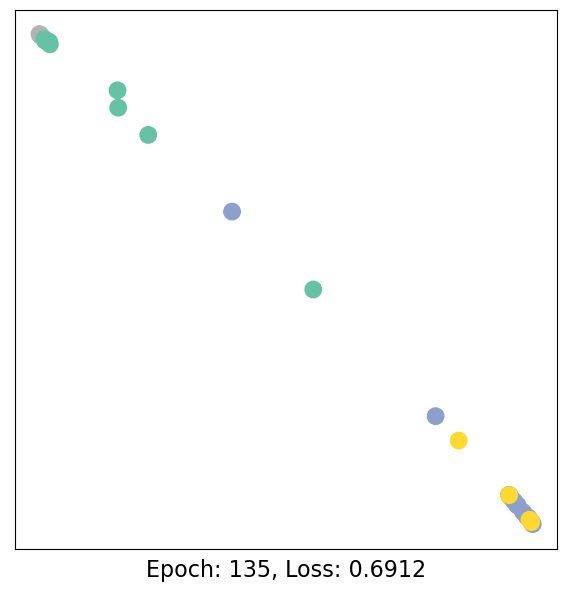

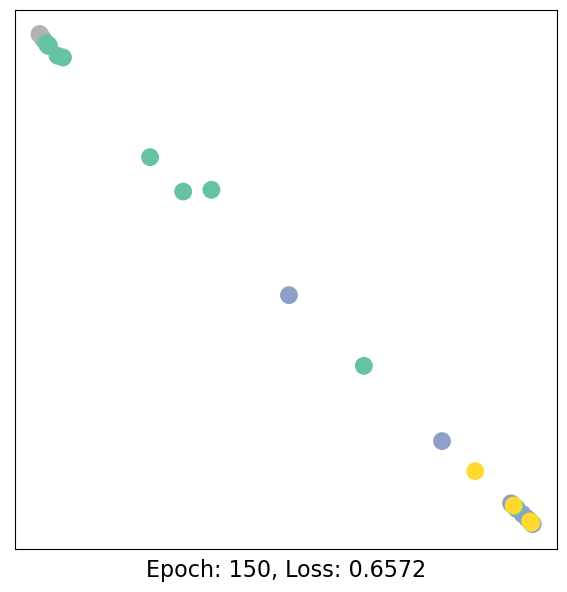

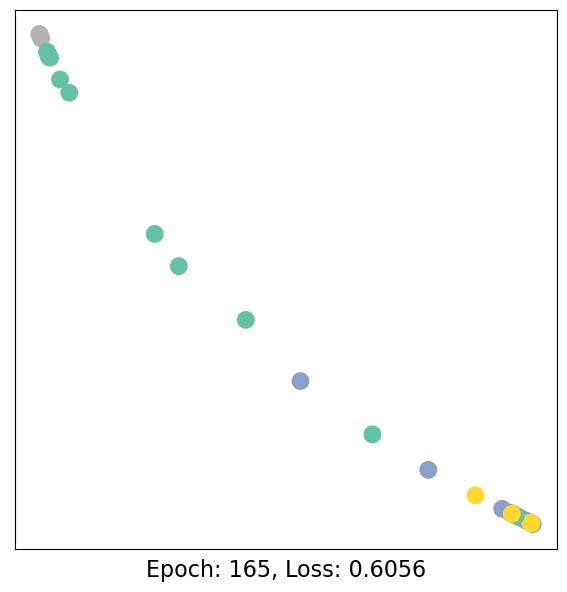

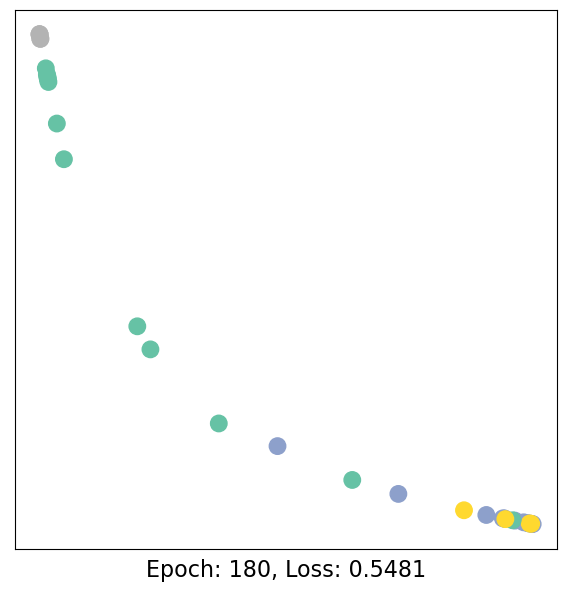

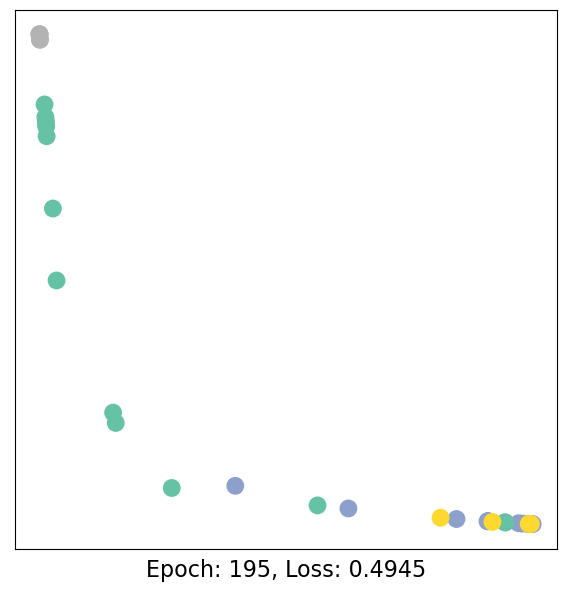

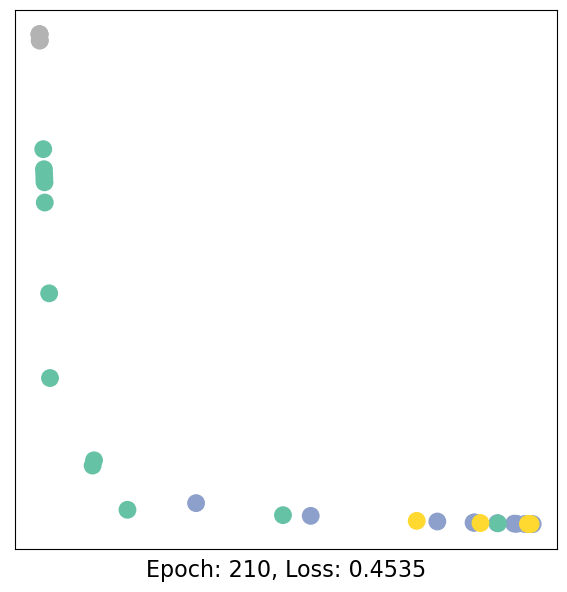

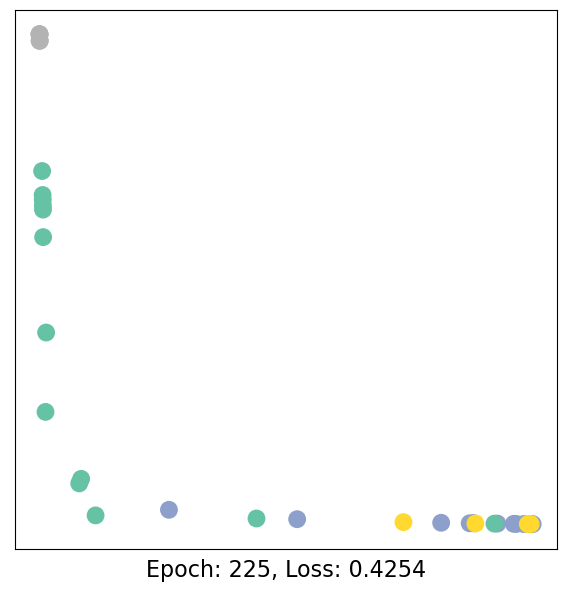

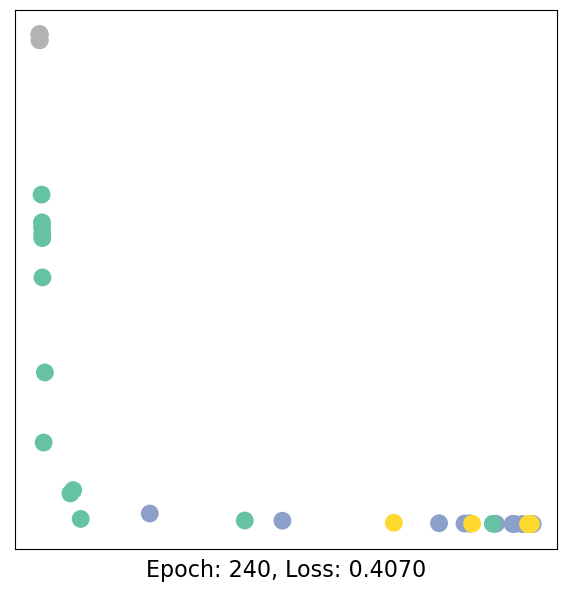

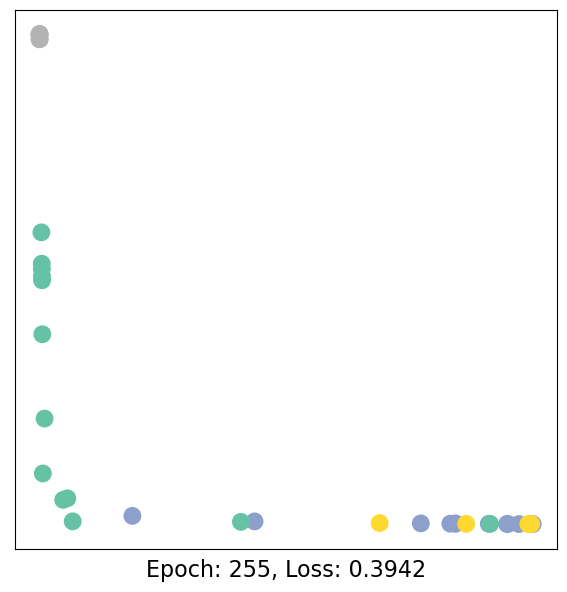

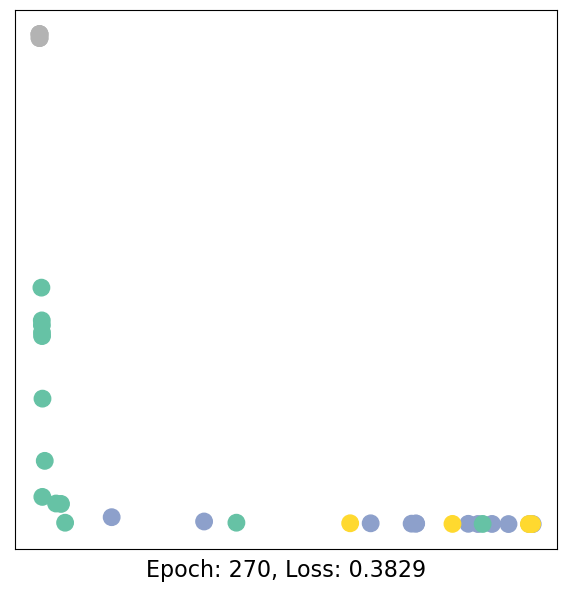

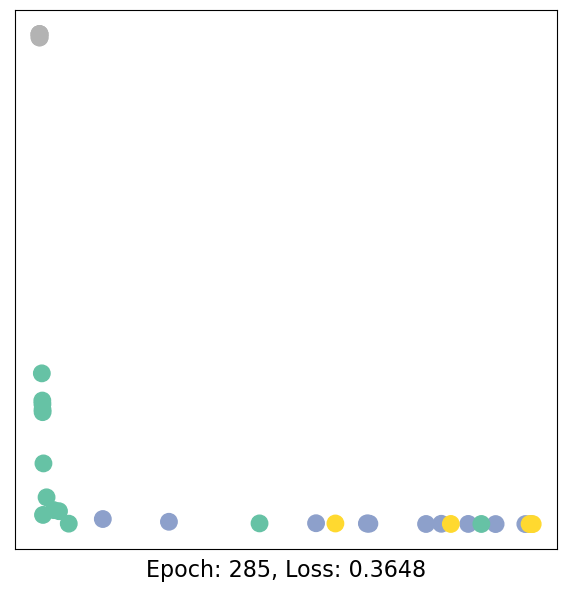

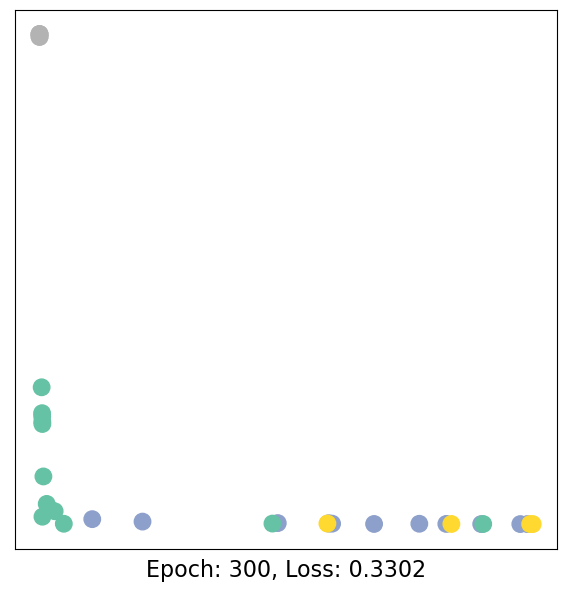

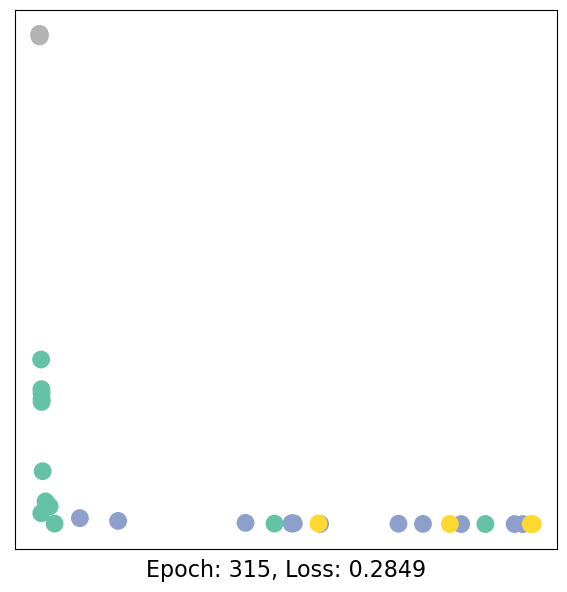

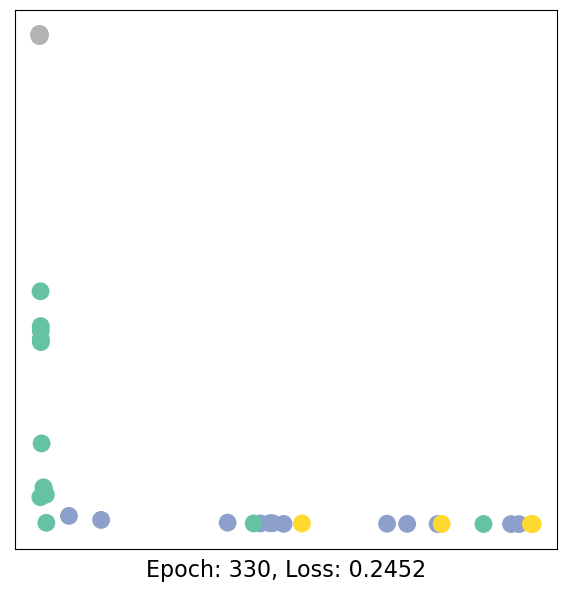

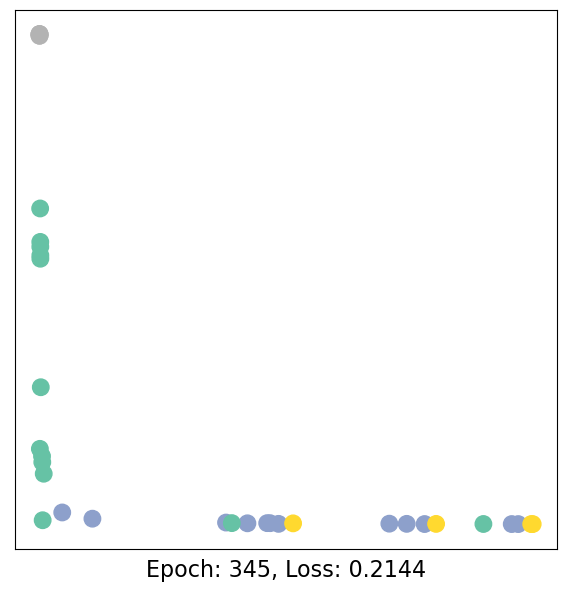

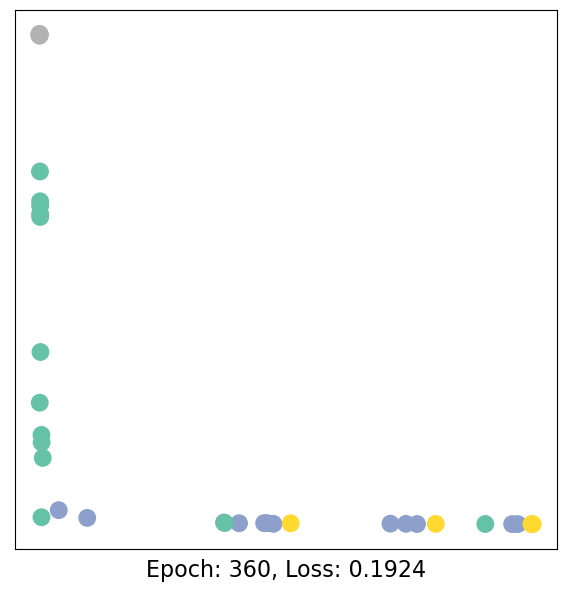

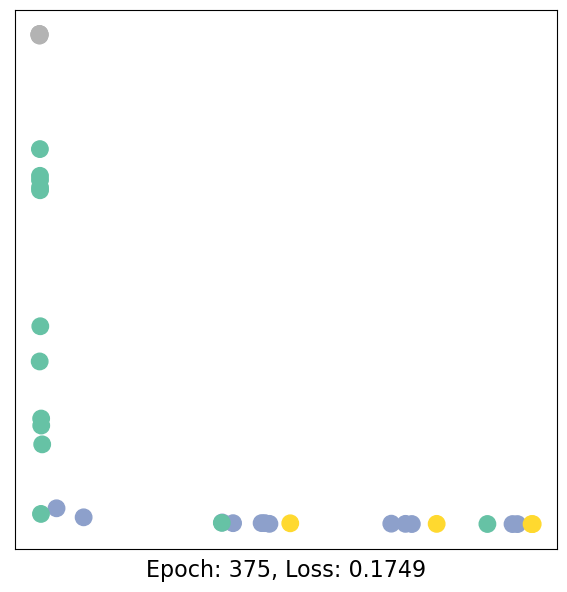

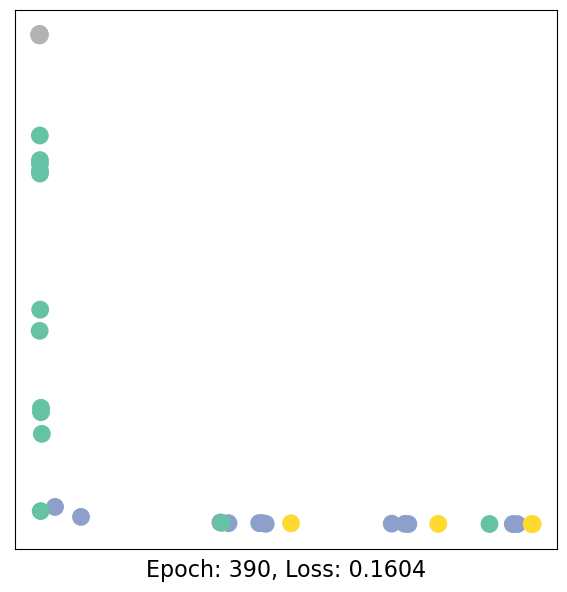

In [46]:
model = GCN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

for epoch in range(401):
    loss, h = train(data)
    if epoch % 15 == 0:
        visualize(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.5)